# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.1
Type 'citation("mclust")' for citing this R package in publications.


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [2]:
clus <-Mclust(datos, G=4)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log.likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 

* a) Es un modelo de agrupación que se apĺica a modelos basados en clasificación y tambíen para modelos de densidad


  **Parametros de entrada:** Un dataset con datos estructurados y sin etiqueta (modelo no supervisado) 
     
     
  **Parametros de Salida:** según se requiera, se pueden ir agrupando los datos para después mostrar un mapa de      densidad o clasificar el dataset en grupos o categorias según se requiera.

     
* b) Clasifica según los componentes de la Leche, entonces los agrupa en diferentes 4 grupos (se puede cambiar este número) y luego se los asigna a cada animal correspondiente

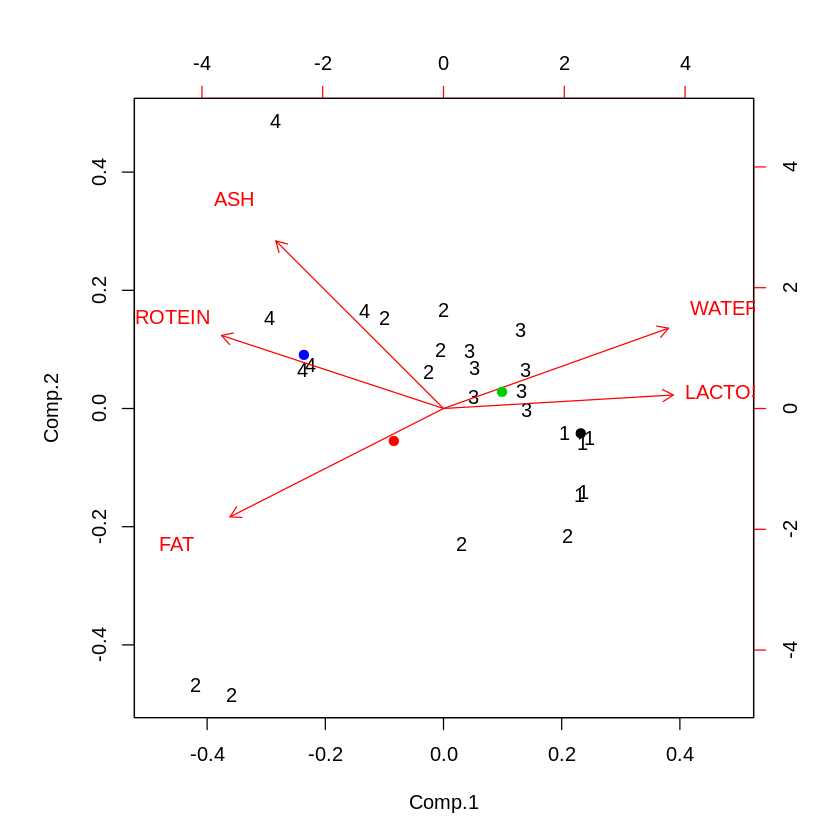

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means
* 

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

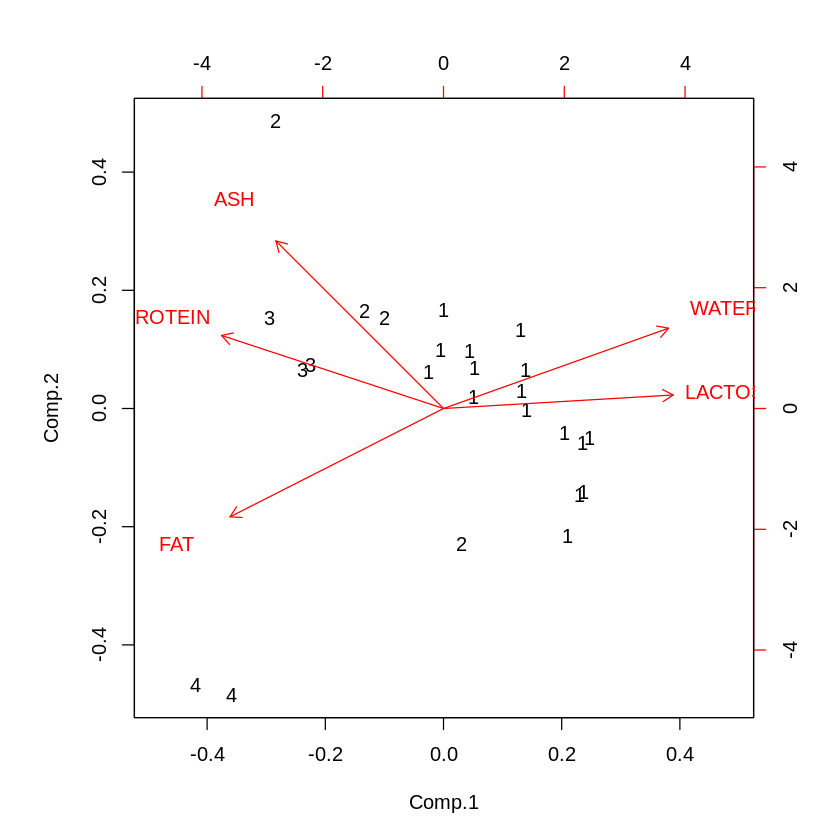

In [16]:
res3 <- hclust(dist(datos), method = "centroid")
biplot(res, xlabs= cutree(res3,4))

* Ejercicio 3: 
    a) Explique como funciona el método hclust, describa parámetros de entrada y salida.
    * Es un agrupamiento jerarquico que construye una jerarquia de abajo hacia arriba. 
    
    
   **Parametros de Entrada:** un conjunto de datos de distancias (por eso se ocupa dist), tambien como opcional puede recibir el metodo de aglomeración que será utilizado, otro parametro puede ser d, que se toma como una  matriz de disimilitud.   
    
    
 **Parametros de Salida:** Entrega como salida un "arbol" jerarquico el cual se puede dividir en distintos niveles
 
b) Interprete y comente los resultados obtenidos. 
  * Al igual que el mclust, agrupa según los componentes de la leche, pero de manera jerarquica, donde los grupos quedan de manera diferente, como se hacen 3 cortes, se agrupa en 4 grupos, estos cortes se pueden cambiar desde los parametros.
  
  
c) Utilice otros parámetros en hclust y discuta como varían los resultados. 
  * Se pueden cambiar el numero de cortes en la función cutree, y así se cambian la cantidad de grupos que necesitamos, podemos cambiar el parametro "method", pero no se ven cambios en los grupos.

Ejercicio 4: 
a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.


b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

In [61]:
require("datasets")
data("iris") # load Iris Dataset
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [62]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [63]:
iris.new<- iris[,c(1,2,3,4)]
iris.class<- iris[,"Species"]
head(iris.new)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [64]:
normalize <- function(x){
  return ((x-min(x))/(max(x)-min(x)))
}

iris.new$Sepal.Length<- normalize(iris.new$Sepal.Length)
iris.new$Sepal.Width<- normalize(iris.new$Sepal.Width)
iris.new$Petal.Length<- normalize(iris.new$Petal.Length)
iris.new$Petal.Width<- normalize(iris.new$Petal.Width)
head(iris.new)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.22222222,0.6250000,0.06779661,0.04166667
0.16666667,0.4166667,0.06779661,0.04166667
0.11111111,0.5000000,0.05084746,0.04166667
0.08333333,0.4583333,0.08474576,0.04166667
0.19444444,0.6666667,0.06779661,0.04166667
0.30555556,0.7916667,0.11864407,0.12500000


In [70]:
result<- kmeans(iris.new,3)
result$size

[1] 96 21 33

In [71]:
table(result$cluster,iris.class)

   iris.class
    setosa versicolor virginica
  1      0         46        50
  2     17          4         0
  3     33          0         0

In [37]:
X <- iris[,1:4]
class <- iris$Species

In [45]:
cluster <-Mclust(X, G=3)
summary(cluster)
cluster

cl <- cluster$classification
centers <- t(cluster$parameters$mean)
centers
cl

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log.likelihood   n df       BIC       ICL
       -186.074 150 38 -562.5522 -566.4673

Clustering table:
 1  2  3 
50 45 55 

'Mclust' model object: (VEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.006000,3.428000,1.462000,0.246000
5.915044,2.777451,4.204002,1.298935
6.546807,2.949613,5.482252,1.985523


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

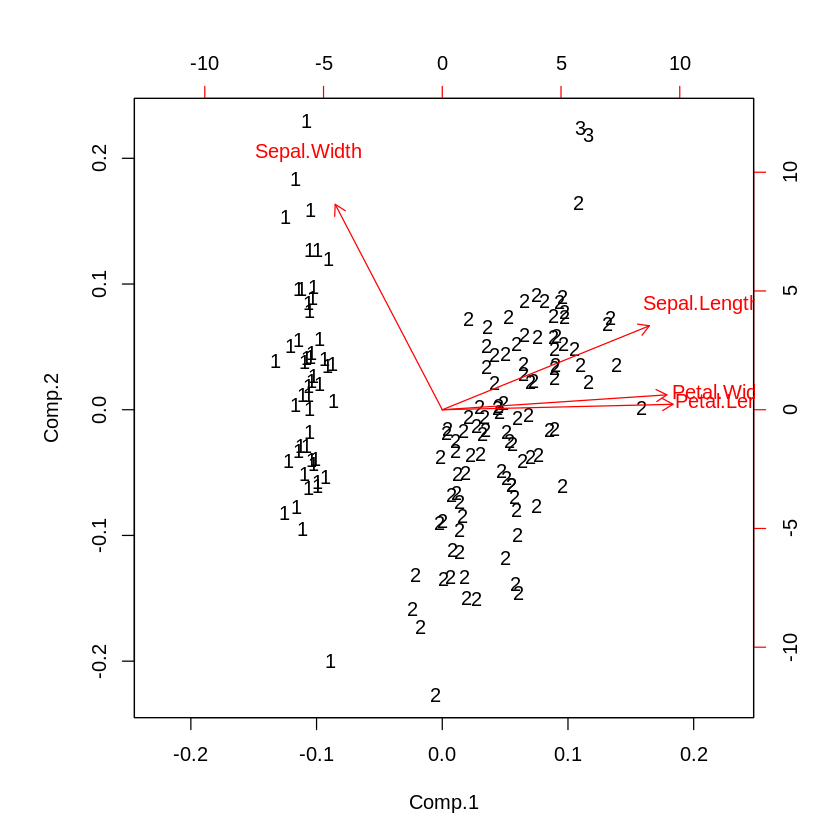

In [46]:
res4 <- princomp(X, cor=TRUE)
res5 <- hclust(dist(X), method = "centroid")
biplot(res4, xlabs= cutree(res5,3))

In [51]:
# Calcular purity para k-means


ERROR: Error in table(class, result$centers): all arguments must have the same length


In [72]:
result$cluster
#Ver que numero de grupo es cual clase

[1] 3 2 2 2 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 3 3 3 2 2 3
 [38] 3 2 3 3 2 2 3 3 2 3 2 3 3 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

In [67]:
#cambiar 
result$cluster[result$cluster==2] = "setosa"
result$cluster[result$cluster==1] = "virginica"
result$cluster[result$cluster==3] = "versicolor"

In [68]:
clusters = as.factor(result$cluster)

In [59]:
clusters

[1] virginica  virginica  virginica  virginica  virginica  virginica 
  [7] virginica  virginica  virginica  virginica  virginica  virginica 
 [13] virginica  virginica  virginica  virginica  virginica  virginica 
 [19] virginica  virginica  virginica  virginica  virginica  virginica 
 [25] virginica  virginica  virginica  virginica  virginica  virginica 
 [31] virginica  virginica  virginica  virginica  virginica  virginica 
 [37] virginica  virginica  virginica  virginica  virginica  virginica 
 [43] virginica  virginica  virginica  virginica  virginica  virginica 
 [49] virginica  virginica  setosa     versicolor setosa     versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor setosa    
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor setosa     versicolor
[103] setosa     setosa     setosa     setosa     versicolor setosa    
[109] setosa     setosa     setosa     setosa     setosa     versicolor
[115] setosa     setosa     setosa     setosa     setosa     versicolor
[121] setosa     versicolor setosa     versicolor setosa     setosa    
[127] versicolor versicolor setosa     setosa     setosa     setosa    
[133] setosa     versicolor versicolor setosa     setosa     setosa    
[139] versicolor setosa     setosa     setosa     versicolor setosa    
[145] setosa     setosa     versicolor setosa     setosa     versicolor
Levels: setosa versicolor virginica

In [69]:
sum(apply(table(class, clusters), 2, max)) / length(clusters)

[1] 0.8866667